# Weighted On Base Average Weights by the Years
***

Data is pulled from wOBA.csv, a file that contains the normal wOBA by the year, a wOBA using weights from the next 5 years, and wOBA using weights from the next 10 years. The first module requires an input from the user. Input the name of the player you'd like to examine, then press Enter.

**Due to this stat needing wOBA for the next 10 years, the players database is from 1950-2008**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

local_path = 'wOBA_Compare.csv'

file_path = local_path

dfTW = pd.read_csv(file_path)

player = input()

Barry Bonds


This block will show the wOBAs for the player inputted, for the current year as well as the next 5 and 10 years.

In [4]:
dfPlayer = dfTW.loc[dfTW["name"] == player].copy()

dfPlayer.head(50)

,name,yearID,wOBA,fiveYears,tenYears,Difference
14154,Barry Bonds,1986,0.336,0.338,0.337,-0.001
14155,Barry Bonds,1987,0.355,0.363,0.361,-0.006
14156,Barry Bonds,1988,0.392,0.393,0.388,0.004
14157,Barry Bonds,1989,0.365,0.363,0.360,0.005
14158,Barry Bonds,1990,0.437,0.435,0.430,0.007
14159,Barry Bonds,1991,0.425,0.423,0.419,0.006
14160,Barry Bonds,1992,0.498,0.488,0.484,0.014
14161,Barry Bonds,1993,0.516,0.511,0.508,0.008
14162,Barry Bonds,1994,0.470,0.472,0.470,0.000
14163,Barry Bonds,1995,0.451,0.449,0.447,0.004


A graph of the current player's wOBA. In general, values will usually follow a similar trend. If the wOBA (blue) is higher than its wOBA 5 years and 10 years, this means their performance would not be good in the following years. Vice versa, a wOBA 10 years that is above the normal wOBA means that their performance for that year was good even in comparison to the next years. This might mean various things.

E:\Chau\Anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


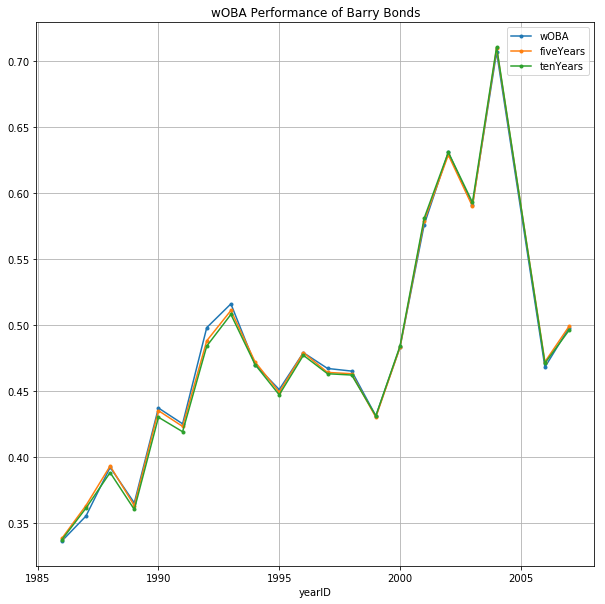

In [5]:
dfPlayer.plot(x="yearID", y=["wOBA", "fiveYears", "tenYears"], figsize=(10,10), grid=True, style = '.-', title = "wOBA Performance of " + player) 


The last column, Difference, exists to examine this comparison between the 10 year wOBA versus the normal wOBA. 

wOBA - tenYears = Difference. 

Therefore a positive Difference means that they did well in that year compared to the eWOBA of ten years. The below code will show a graph of the player's difference more clearly, as well as a comparison of the averages for Differences for that year.

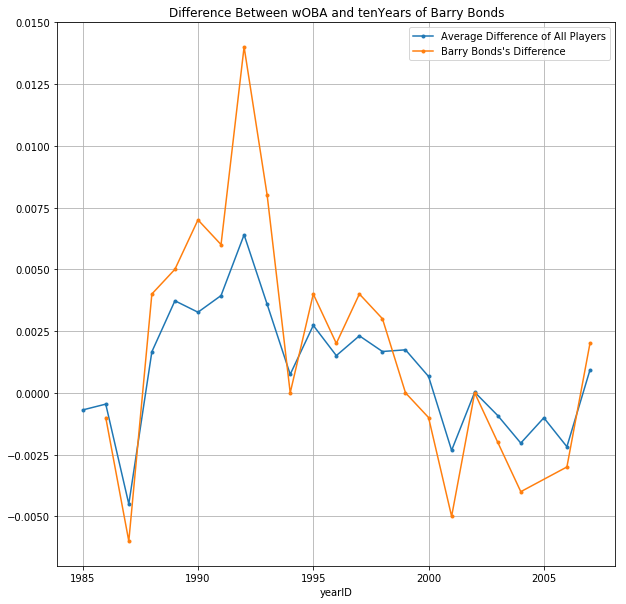

In [34]:
dfYears = dfTW.groupby(by="yearID").mean()
ax = dfYears["Difference"].loc[(dfYears.index > 1984) & (dfYears.index < 2008)].plot(style = '.-')

dfPlayer.plot(x="yearID", y="Difference", figsize=(10,10), ax=ax, grid=True, style = '.-', title="Difference Between wOBA and tenYears of " + player) 
ax.legend(["Average Difference of All Players", player+"'s Difference"])

Below is some data about year averages, which does not rely on individual players. This information is used in the write up.

A correlation between wOBA and tenYears shows that they are similar types of statistics but not exactly the same.

In [21]:
dfYears['wOBA'].corr(dfYears['tenYears'], method='pearson')

0.96918668979472

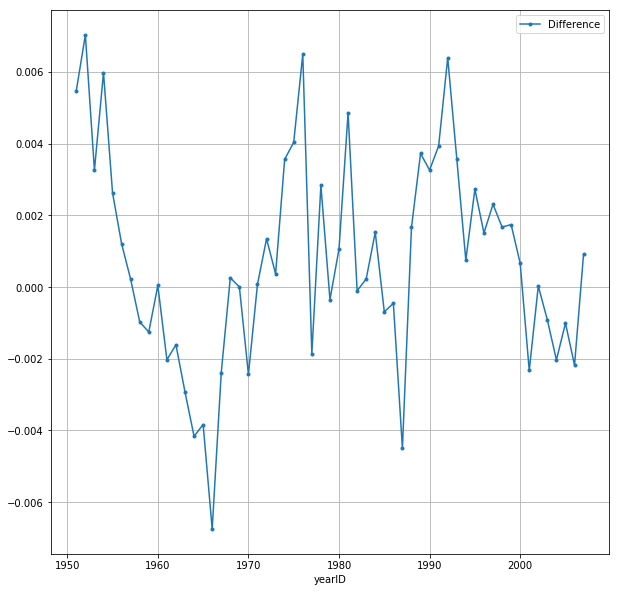

In [8]:
dfYears.plot(y="Difference", figsize=(10,10), grid=True, style = '.-') 